In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
import datetime
import json
import statsmodels.api as sm
import math

In [3]:
df = pd.read_csv('data/Portfolios_Formed_on_BE-ME.CSV',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Value Weight Returns -- Monthly,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
1,192607,12.07,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,4.63,1.22,11.38,1.68,1.50,2.12,2.40,2.45,0.63,0.52
2,192608,-9.73,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,0.15,2.19,6.39,2.38,1.58,2.62,4.77,4.17,8.31,3.92
3,192609,-15.16,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,-0.11,-2.32,6.30,0.73,-0.89,0.40,-0.28,0.04,-2.16,0.44
4,192610,-5.63,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,-3.78,-1.67,-5.01,-1.41,-2.31,-2.07,-4.77,-2.84,-5.46,-1.17


In [4]:
index = df.index
breakpts = []
for i in index:
    if 'Returns' in str(df.iloc[i,0]):
        breakpts.append(i)
breakpts

[0, 1162, 2324, 2421]

In [9]:
vwm = df.iloc[0:1162]
vwm_ar = vwm.to_numpy()
vwm_header = list(vwm_ar[0])
vwm_ar = vwm_ar[1:]
vwm = pd.DataFrame(data=vwm_ar,columns=vwm_header)

index = vwm.index
months = []
years = []

for i in index:
    ym_str = str(vwm.iloc[i,0])
    years.append(int(ym_str[:4]))
    months.append(int(ym_str[4:]))

vwm['Month'] = pd.Series(months,index=index)
vwm['Year'] = pd.Series(years,index=index)

vwm.drop(columns=[vwm_header[0],vwm_header[1]],inplace=True)
vwm.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Month,Year
0,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,4.63,1.22,11.38,1.68,1.50,2.12,2.40,2.45,0.63,0.52,7,1926
1,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,0.15,2.19,6.39,2.38,1.58,2.62,4.77,4.17,8.31,3.92,8,1926
2,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,-0.11,-2.32,6.30,0.73,-0.89,0.40,-0.28,0.04,-2.16,0.44,9,1926
3,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,-3.78,-1.67,-5.01,-1.41,-2.31,-2.07,-4.77,-2.84,-5.46,-1.17,10,1926
4,3.13,2.95,2.94,4.12,2.56,1.90,3.96,2.48,6.03,1.51,1.10,3.63,1.97,1.81,4.20,3.39,2.77,1.76,11,1926


In [11]:
ewm = df.iloc[1162:2324]
ewm_ar = ewm.to_numpy()
ewm_header = list(ewm_ar[0])
ewm_ar = ewm_ar[1:]
ewm = pd.DataFrame(data=ewm_ar,columns=ewm_header)

index = ewm.index
months = []
years = []

for i in index:
    ym_str = str(ewm.iloc[i,0])
    years.append(int(ym_str[:4]))
    months.append(int(ym_str[4:]))

ewm['Month'] = pd.Series(months,index=index)
ewm['Year'] = pd.Series(years,index=index)

ewm.drop(columns=[ewm_header[0],ewm_header[1]],inplace=True)
ewm.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Month,Year
0,2.66,1.08,0.42,3.01,2.03,1.00,1.56,-0.81,4.52,1.53,1.99,2.07,0.07,1.96,0.23,2.88,-1.44,-0.17,7,1926
1,1.29,1.55,5.59,0.43,1.90,2.23,2.72,6.15,0.34,0.51,3.00,0.81,2.79,1.66,0.96,4.49,5.81,6.48,8,1926
2,-1.70,-0.36,0.10,-1.97,-0.14,-0.92,-0.98,0.88,0.36,-4.25,-1.16,0.88,-0.74,-1.10,-0.50,-1.45,-2.17,3.93,9,1926
3,-3.54,-3.31,-2.83,-3.98,-2.72,-3.14,-3.10,-3.23,-4.12,-3.83,-2.67,-2.78,-2.31,-3.98,-4.18,-2.01,-4.58,-1.88,10,1926
4,2.07,3.25,2.80,2.43,2.90,2.51,3.51,2.44,4.44,0.47,1.35,4.45,3.56,1.47,3.51,3.51,2.23,2.66,11,1926


In [12]:
vwa = df.iloc[2324:2421]
vwa_ar = vwa.to_numpy()
vwa_header = list(vwa_ar[0])
vwa_ar = vwa_ar[1:]
vwa = pd.DataFrame(data=vwa_ar,columns=vwa_header)

index = vwa.index
years = []

for i in index:
    ym_str = str(vwa.iloc[i,0])
    years.append(int(ym_str[:]))

vwa['Year'] = pd.Series(years,index=index)

vwa.drop(columns=[vwa_header[0],vwa_header[1]],inplace=True)
vwa.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year
0,44.07,23.41,32.36,44.90,31.16,23.11,26.81,40.66,57.86,25.60,42.91,20.22,20.37,25.96,28.34,24.74,38.24,48.27,1927
1,45.78,31.62,34.63,48.42,38.14,34.69,22.70,35.97,48.57,50.02,39.59,37.39,46.70,25.73,14.92,33.23,37.35,27.71,1928
2,-19.82,-1.42,-9.71,-21.82,-9.63,-2.37,-3.50,-11.49,-26.86,-8.80,-13.38,-6.62,-0.39,-1.41,0.07,-8.37,-8.27,-25.39,1929
3,-26.33,-28.88,-43.62,-26.10,-26.80,-27.90,-38.95,-52.71,-29.12,-20.56,-26.97,-26.85,-25.33,-35.07,-38.47,-40.58,-52.64,-56.32,1930
4,-36.78,-59.69,-54.92,-36.18,-44.79,-62.51,-59.72,-51.84,-37.53,-33.93,-37.80,-53.84,-60.49,-63.04,-62.86,-55.44,-50.79,-55.62,1931


In [13]:
ewa = df.iloc[2421:]
ewa_ar = ewa.to_numpy()
ewa_header = list(ewa_ar[0])
ewa_ar = ewa_ar[1:]
ewa = pd.DataFrame(data=ewa_ar,columns=ewa_header)

index = ewa.index
years = []

for i in index:
    ym_str = str(ewa.iloc[i,0])
    years.append(int(ym_str[:]))

ewa['Year'] = pd.Series(years,index=index)

ewa.drop(columns=[ewa_header[0],ewa_header[1]],inplace=True)
ewa.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Year
0,34.69,26.84,38.85,35.59,32.47,25.60,27.98,42.04,43.29,28.35,32.75,32.16,28.91,22.31,23.82,32.30,41.81,41.94,1927
1,40.52,38.85,45.35,41.27,43.60,35.80,29.73,56.92,42.29,39.99,38.99,48.00,41.95,29.80,35.78,23.81,51.10,62.35,1928
2,-32.38,-26.31,-34.89,-32.99,-31.20,-24.93,-28.04,-36.51,-32.78,-33.37,-31.29,-31.14,-19.30,-30.18,-24.25,-31.69,-35.02,-38.07,1929
3,-33.21,-34.99,-44.68,-33.26,-31.09,-36.47,-40.57,-45.73,-35.42,-31.17,-33.39,-28.94,-36.30,-36.71,-38.24,-42.91,-44.03,-47.69,1930
4,-40.15,-49.41,-43.29,-39.83,-42.89,-50.73,-49.42,-40.88,-37.68,-41.94,-40.89,-44.94,-51.38,-50.15,-51.18,-47.88,-43.06,-39.27,1931


In [19]:
vwm_21st_cent = vwm[vwm['Year']>=2000]
ewm_21st_cent = ewm[ewm['Year']>=2000]
vwa_21st_cent = vwa[vwa['Year']>=2000]
ewa_21st_cent = ewa[ewa['Year']>=2000]

# Read in French-Fama data on Book Value / Market Cap ratio and created 4 dataframes. The 4 dataframes differ based on weighting (equal or value) and return type (monthly or annual). I also create dataframes for 21st century only.

# Value Weighted monthly returns analysis

In [14]:
vwm.head()

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10,Month,Year
0,5.55,1.86,1.54,3.18,5.41,1.78,2.41,0.60,4.63,1.22,11.38,1.68,1.50,2.12,2.40,2.45,0.63,0.52,7,1926
1,2.65,2.67,5.61,1.00,4.01,2.05,4.59,7.10,0.15,2.19,6.39,2.38,1.58,2.62,4.77,4.17,8.31,3.92,8,1926
2,1.28,0.07,-0.71,-1.04,3.04,-0.29,-0.19,-1.46,-0.11,-2.32,6.30,0.73,-0.89,0.40,-0.28,0.04,-2.16,0.44,9,1926
3,-3.60,-2.41,-3.55,-2.89,-2.96,-2.20,-4.20,-4.28,-3.78,-1.67,-5.01,-1.41,-2.31,-2.07,-4.77,-2.84,-5.46,-1.17,10,1926
4,3.13,2.95,2.94,4.12,2.56,1.90,3.96,2.48,6.03,1.51,1.10,3.63,1.97,1.81,4.20,3.39,2.77,1.76,11,1926


In [57]:
orig_index = vwm.index
lq = []
hq = []
lq_21 = []
hq_21 = []
#loop thru value weighted monthly returns and append montly percentage returns to appropriate lists
for i in orig_index:
    row = vwm.iloc[i]
    lq.append(float(row['Lo 20']))
    hq.append(float(row['Hi 20']))
    
index = vwm_21st_cent.index
for i in index:
    row = vwm_21st_cent.loc[i]
    lq_21.append(float(row['Lo 20']))
    hq_21.append(float(row['Hi 20']))


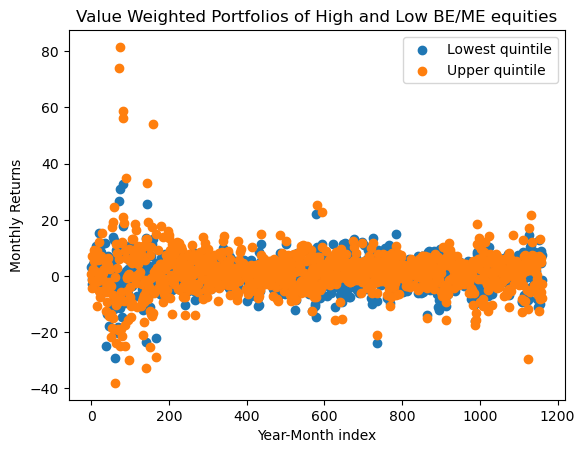

In [58]:
plt.scatter(orig_index,lq,label='Lowest quintile')
plt.scatter(orig_index,hq,label='Upper quintile')
plt.xlabel('Year-Month index')
plt.ylabel('Monthly Returns')
plt.title('Value Weighted Portfolios of High and Low BE/ME equities')
plt.legend()

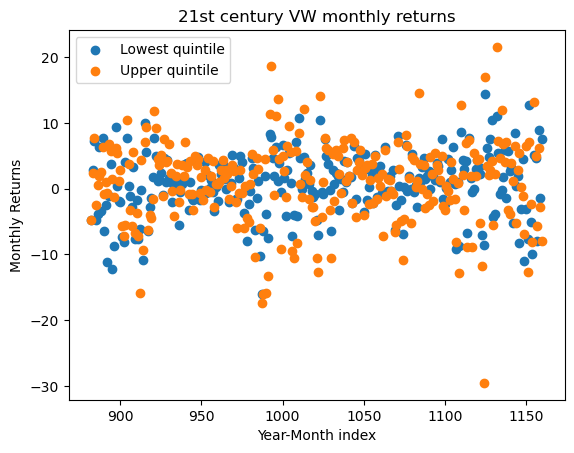

In [59]:
plt.scatter(index,lq_21,label='Lowest quintile')
plt.scatter(index,hq_21,label='Upper quintile')
plt.xlabel('Year-Month index')
plt.ylabel('Monthly Returns')
plt.title('21st century VW monthly returns')
plt.legend()

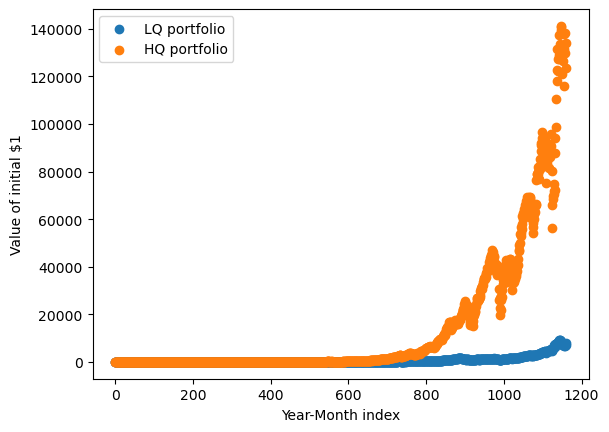

In [62]:
#Compute value of $1

lq_tr = [1]
hq_tr = [1]
lq_21_tr = [1]
hq_21_tr = [1]

for el in lq:
    cur_mr = el/100
    lq_tr.append(lq_tr[-1]*(1+cur_mr))

for el in hq:
    cur_mr = el/100
    hq_tr.append(hq_tr[-1]*(1+cur_mr))

for el in lq_21:
    cur_mr = el/100
    lq_21_tr.append(lq_21_tr[-1]*(1+cur_mr))

for el in hq_21:
    cur_mr = el/100
    hq_21_tr.append(hq_21_tr[-1]*(1+cur_mr))

lq_tr=lq_tr[1:]
hq_tr=hq_tr[1:]
lq_21_tr = lq_21_tr[1:]
hq_21_tr = hq_21_tr[1:]

plt.scatter(orig_index, lq_tr, label = 'LQ portfolio')
plt.scatter(orig_index, hq_tr, label = 'HQ portfolio')
plt.xlabel('Year-Month index')
plt.ylabel('Value of initial $1')
plt.legend()


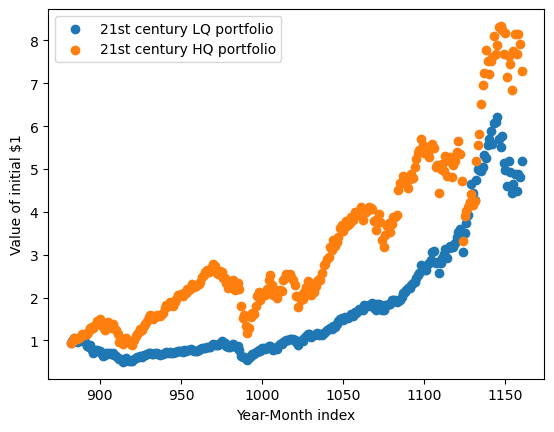

In [63]:
plt.scatter(index, lq_21_tr, label = '21st century LQ portfolio')
plt.scatter(index, hq_21_tr, label = '21st century HQ portfolio')
plt.xlabel('Year-Month index')
plt.ylabel('Value of initial $1')
plt.legend()

# Value weighted annual returns analysis

In [64]:
orig_index = vwa.index
lq = []
hq = []
lq_21 = []
hq_21 = []

#loop thru Value Weighted Annual Returns df and append returns to appropriate lists
for i in orig_index:
    row = vwa.iloc[i]
    lq.append(float(row['Lo 20']))
    hq.append(float(row['Hi 20']))
    
index = vwa_21st_cent.index
for i in index:
    row = vwa_21st_cent.loc[i]
    lq_21.append(float(row['Lo 20']))
    hq_21.append(float(row['Hi 20']))

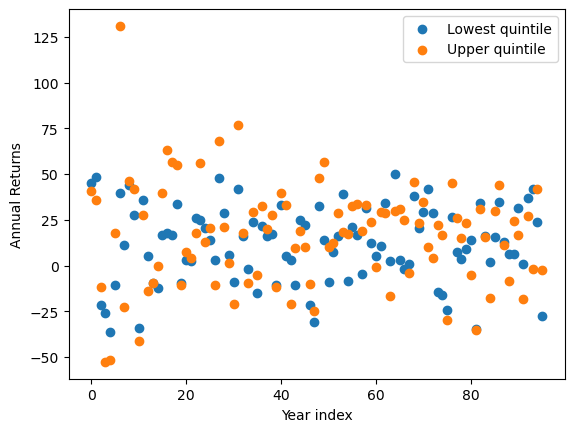

In [65]:
plt.scatter(orig_index,lq,label='Lowest quintile')
plt.scatter(orig_index,hq,label='Upper quintile')
plt.xlabel('Year index')
plt.ylabel('Annual Returns')
plt.legend()

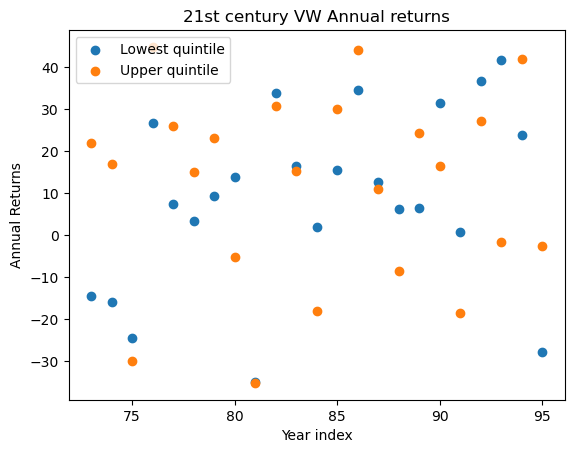

In [66]:
plt.scatter(index,lq_21,label='Lowest quintile')
plt.scatter(index,hq_21,label='Upper quintile')
plt.xlabel('Year index')
plt.ylabel('Annual Returns')
plt.title('21st century VW Annual returns')
plt.legend()

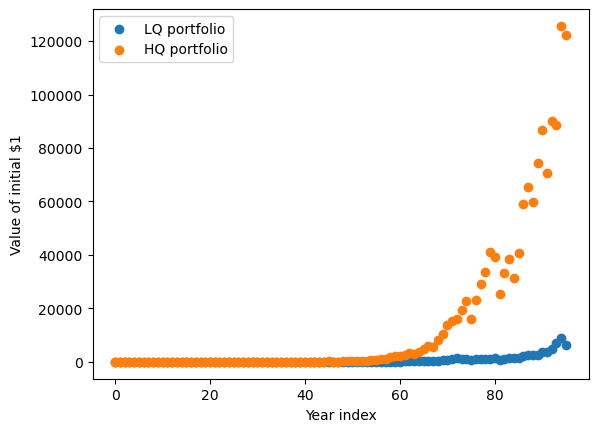

In [68]:
#Compute value of $1

lq_tr = [1]
hq_tr = [1]
lq_21_tr = [1]
hq_21_tr = [1]

for el in lq:
    cur_yr = el/100
    lq_tr.append(lq_tr[-1]*(1+cur_yr))

for el in hq:
    cur_yr = el/100
    hq_tr.append(hq_tr[-1]*(1+cur_yr))

for el in lq_21:
    cur_yr = el/100
    lq_21_tr.append(lq_21_tr[-1]*(1+cur_yr))

for el in hq_21:
    cur_yr = el/100
    hq_21_tr.append(hq_21_tr[-1]*(1+cur_yr))

lq_tr=lq_tr[1:]
hq_tr=hq_tr[1:]
lq_21_tr = lq_21_tr[1:]
hq_21_tr = hq_21_tr[1:]

plt.scatter(orig_index, lq_tr, label = 'LQ portfolio')
plt.scatter(orig_index, hq_tr, label = 'HQ portfolio')
plt.xlabel('Year index')
plt.ylabel('Value of initial $1')
plt.legend()

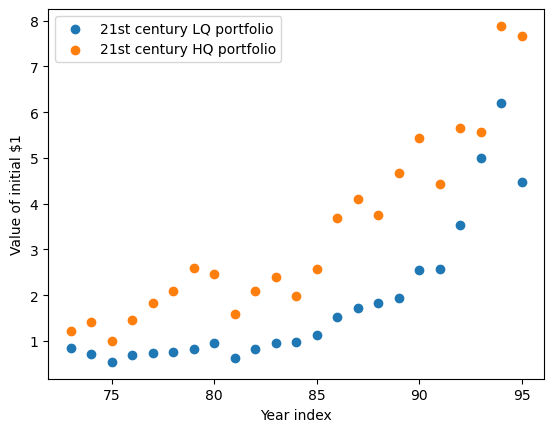

In [69]:
plt.scatter(index, lq_21_tr, label = '21st century LQ portfolio')
plt.scatter(index, hq_21_tr, label = '21st century HQ portfolio')
plt.xlabel('Year index')
plt.ylabel('Value of initial $1')
plt.legend()

# When looking at the plots showing the value of an initial 1$ investment in   